<a href="https://colab.research.google.com/github/plance17/Aprendizaje-de-Maquina/blob/master/Teor%C3%ADa_4_Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyradiomics

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import scipy
import math
import pandas as pd 
from scipy import linalg, optimize
#from sympy.solvers import solve
#from sympy import Symbol

from sklearn import neighbors
from sklearn import metrics
from skimage.feature import hog
from sklearn import svm
import sklearn

#import array as arr

import urllib.request 

import zipfile
import cv2 as cv

from radiomics import featureextractor
import os
import SimpleITK as sitk

In [4]:
# Descarga y descomprimir
dataroot = "dataroot/"
!mkdir dataroot 
!wget -P dataroot https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/fvk7h5dg2p-1.zip

mkdir: cannot create directory ‘dataroot’: File exists
--2020-11-06 03:40:14--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/fvk7h5dg2p-1.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.108.64
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.108.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198985388 (190M) [application/octet-stream]
Saving to: ‘dataroot/fvk7h5dg2p-1.zip.2’

fvk7h5dg2p-1.zip.2  100%[===================>] 189.77M  68.4MB/s    in 2.8s    

2020-11-06 03:40:17 (68.4 MB/s) - ‘dataroot/fvk7h5dg2p-1.zip.2’ saved [198985388/198985388]



In [5]:
with zipfile.ZipFile(dataroot+"fvk7h5dg2p-1.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
    names = [info.filename for info in zip_ref.infolist()]# if info.is_dir()]
print(names)

['Pneumonia/', 'Pneumonia/person71_virus_132.jpeg', 'Pneumonia/person1678_virus_2895.jpeg', 'Pneumonia/person22_virus_55.jpeg', 'Pneumonia/person1628_virus_2821.jpeg', 'Pneumonia/person52_virus_106.jpeg', 'Pneumonia/person26_virus_60.jpeg', 'Pneumonia/person75_virus_136.jpeg', 'Pneumonia/person59_virus_116.jpeg', 'Pneumonia/person1670_virus_2886.jpeg', 'Pneumonia/person1613_virus_2799.jpeg', 'Pneumonia/person67_virus_126.jpeg', 'Pneumonia/person1622_virus_2810.jpeg', 'Pneumonia/person1608_virus_2786.jpeg', 'Pneumonia/person1660_virus_2869.jpeg', 'Pneumonia/person1653_virus_2858.jpeg', 'Pneumonia/person18_virus_49.jpeg', 'Pneumonia/person38_virus_83.jpeg', 'Pneumonia/person1614_virus_2800.jpeg', 'Pneumonia/person1637_virus_2834.jpeg', 'Pneumonia/person1661_virus_2873.jpeg', 'Pneumonia/person1685_virus_2903.jpeg', 'Pneumonia/person28_virus_62.jpeg', 'Pneumonia/person1655_virus_2861.jpeg', 'Pneumonia/person36_virus_81.jpeg', 'Pneumonia/person43_virus_92.jpeg', 'Pneumonia/person1626_virus_

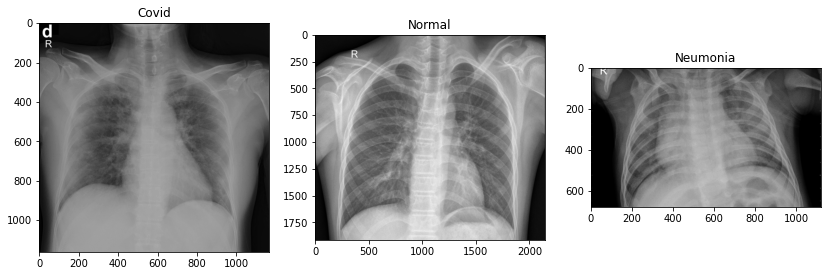

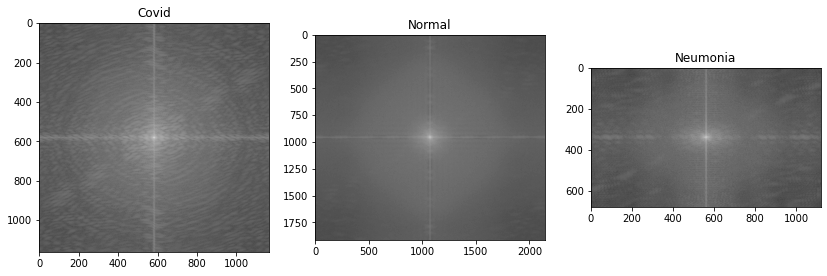

In [6]:
img_covid     = cv.imread(dataroot+'COVID-19 cases/1-s2.0-S0929664620300449-gr2_lrg-d.jpg',0)  #Second argument is a flag which specifies the way image should be read.
img_normal    = cv.imread(dataroot+'Normal /IM-0011-0001-0001.jpeg',0)
img_pneumonia = cv.imread(dataroot+'Pneumonia/person1650_virus_2854.jpeg',0)

#Segundo argumento de cv.imread 
#-1: Loads image as such including alpha channel 
#0:Loads image in grayscale mode
#1Loads a color image. Any transparency of image will be neglected. It is the default flag.
f_covid = np.fft.fft2(img_covid)
f_normal = np.fft.fft2(img_normal)
f_pneumonia = np.fft.fft2(img_pneumonia)

fshift_covid = np.fft.fftshift(f_covid)
magnitude_spectrum_covid = 20*np.log(np.abs(fshift_covid))

fshift_normal = np.fft.fftshift(f_normal)
magnitude_spectrum_normal = 20*np.log(np.abs(fshift_normal))

fshift_pneumonia = np.fft.fftshift(f_pneumonia)
magnitude_spectrum_pneumonia = 20*np.log(np.abs(fshift_pneumonia))

plt.figure(figsize=(14,14))
plt.subplot(1,3,1).set_title('Covid')
plt.imshow(img_covid,cmap='gray')
plt.subplot(1,3,2).set_title('Normal')
plt.imshow(img_normal,cmap='gray')
plt.subplot(1,3,3).set_title('Neumonia')
plt.imshow(img_pneumonia,cmap='gray')
plt.show()

plt.figure(figsize=(14,14))
plt.subplot(1,3,1).set_title('Covid')
plt.imshow(magnitude_spectrum_covid,cmap='gray')
plt.subplot(1,3,2).set_title('Normal')
plt.imshow(magnitude_spectrum_normal,cmap='gray')
plt.subplot(1,3,3).set_title('Neumonia')
plt.imshow(magnitude_spectrum_pneumonia,cmap='gray')



In [8]:
zip_ref.printdir()

File Name                                             Modified             Size
Pneumonia/                                     2020-06-10 15:14:42            0
Pneumonia/person71_virus_132.jpeg              2020-06-10 15:14:42       117286
Pneumonia/person1678_virus_2895.jpeg           2020-06-10 15:14:42       118628
Pneumonia/person22_virus_55.jpeg               2020-06-10 15:14:42        63275
Pneumonia/person1628_virus_2821.jpeg           2020-06-10 15:14:42        54996
Pneumonia/person52_virus_106.jpeg              2020-06-10 15:14:42        56909
Pneumonia/person26_virus_60.jpeg               2020-06-10 15:14:42        66772
Pneumonia/person75_virus_136.jpeg              2020-06-10 15:14:42        55188
Pneumonia/person59_virus_116.jpeg              2020-06-10 15:14:42        53215
Pneumonia/person1670_virus_2886.jpeg           2020-06-10 15:14:42        55391
Pneumonia/person1613_virus_2799.jpeg           2020-06-10 15:14:42        58689
Pneumonia/person67_virus_126.jpeg       

In [9]:
print(cv.imread(dataroot+'Pneumonia/person37_virus_82.jpeg',0))

[[33 32 30 ... 35 35 35]
 [30 30 30 ... 39 37 36]
 [29 30 32 ... 42 39 37]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [10]:
names_column=np.reshape(names,[len(names),1])
print(len(names_column[1,0]))         #Me da la longitud de la palabra
print(names_column.size)
#print(names_column)

count_empty_files=0
for i in np.arange(0,names_column.size):
  img=cv.imread(dataroot+names[i],0)
  if np.any(img)==None:
    count_empty_files=count_empty_files+1

print(count_empty_files)

#En esta matriz voy a guardar los datos de a que corresponde ese índice en los archivos names_column
index=np.zeros(names_column.size-count_empty_files)    #El -count_empty_files es porque hay 3 archivos(uno para cada tipo de pulmon), que está vacío
#Si index[i]=0 entonces names_column[i] es un archivo de una imagen de una radiografía a alguien normal
#Si index[i]=1 entonces names_column[i] es un archivo de una imagen de una radiografía a alguien con neumonia
#Si index[i]=2 entonces names_column[i] es un archivo de una imagen de una radiografía a alguien con covid

o=0 #Tengo que usar o como contador, porque i va de 0 a names_column.size(606), y la matriz index va hasta 603 
for i in np.arange(0,names_column.size):
  img=cv.imread(dataroot+names[i],0)
  if np.any(img)!=None:
    character=[None]*len(names_column[i,0])
    n=0
    #print(character)
    #print(len(names_column[i,0]))
    #j va a tomar como "valor" la letra de la palabra del nombre del archivo
    for j in names_column[i,0]:
      character[n]=j
      n=n+1 
    if character[0]=='N':
      index[o]=0 
    if character[0]=='P':
      index[o]=1
    if character[0]=='C':
      index[o]=2
    o=o+1
print(index)


33
606
3
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [11]:
num_normal_photos=0
num_neumonia_photos=0
num_covid_photos=0


#Hay un archivo para radiografias normales, con neumonia y con covid que está vacío, lo tengo que sacar, por eso la condición   np.any(img)!=None
for i in np.arange(0,index.size):
  if index[i]==0:
    num_normal_photos=num_normal_photos+1
  if index[i]==1:
    num_neumonia_photos=num_neumonia_photos+1
  if index[i]==2:
    num_covid_photos=num_covid_photos+1

print('Número de Radiografías normales:',num_normal_photos)
print('Número de Radiografías con neumonia:',num_neumonia_photos)
print('Número de Radiografías con covid:',num_covid_photos) 

Número de Radiografías normales: 234
Número de Radiografías con neumonia: 148
Número de Radiografías con covid: 221


Pneumonia/
[[ 3 16 17 ...  0  0  0]
 [ 3 15 17 ...  0  0  0]
 [ 2 15 17 ...  0  0  0]
 ...
 [ 0  8  4 ... 14 13 13]
 [ 0  8  4 ... 14 15 15]
 [ 0  8  4 ... 14 16 16]]


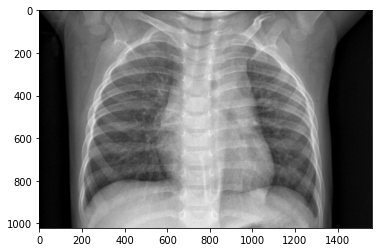

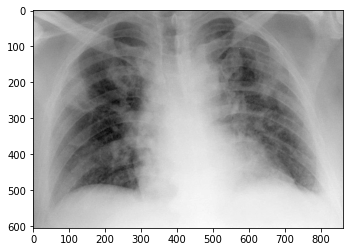

In [12]:
print(names[0])

count_normal=0
count_neumonia=0
count_covid=0

x_normal=[None]*num_normal_photos
y_normal=[None]*num_normal_photos

x_neumonia=[None]*num_neumonia_photos
y_neumonia=[None]*num_neumonia_photos

x_covid=[None]*num_covid_photos
y_covid=[None]*num_covid_photos


o=0
#print(x_normal)
for i in np.arange(0,len(names)):
  img=cv.imread(dataroot+names[i],0)
  if np.any(img)!=None:
    if index[o]==0:
      x_normal[count_normal]=img
      y_normal[count_normal]=0
      count_normal=count_normal+1
    if index[o]==1:
      x_neumonia[count_neumonia]=img
      y_neumonia[count_neumonia]=1
      count_neumonia=count_neumonia+1
    if index[o]==2:
      x_covid[count_covid]=img
      y_covid[count_covid]=2
      count_covid=count_covid+1
    o=o+1


print(x_normal[10])

plt.imshow(x_normal[10],cmap='gray')
plt.show()
plt.imshow(x_covid[50],cmap='gray')
plt.show()



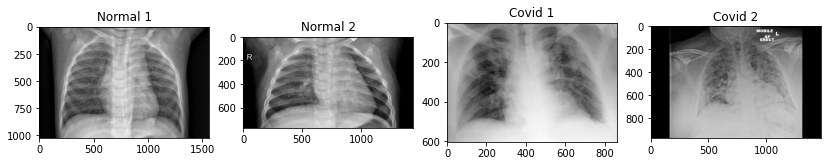

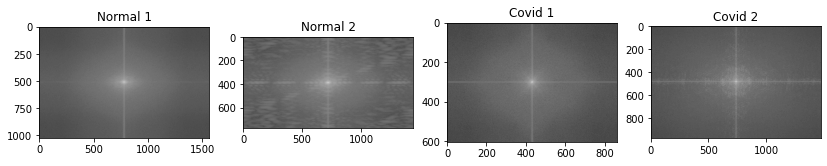

In [14]:
f_covid = np.fft.fft2(x_covid[50])
f_covid2 = np.fft.fft2(x_covid[101])
f_normal = np.fft.fft2(x_normal[10])
f_normal2 = np.fft.fft2(x_normal[100])


fshift_covid = np.fft.fftshift(f_covid)
magnitude_spectrum_covid = 20*np.log(np.abs(fshift_covid))

fshift_covid2 = np.fft.fftshift(f_covid2)
magnitude_spectrum_covid2 = 20*np.log(np.abs(fshift_covid2))

fshift_normal = np.fft.fftshift(f_normal)
magnitude_spectrum_normal = 20*np.log(np.abs(fshift_normal))

fshift_normal2 = np.fft.fftshift(f_normal2)
magnitude_spectrum_normal2 = 20*np.log(np.abs(fshift_normal2))


plt.figure(figsize=(14,14))
plt.subplot(1,4,1).set_title('Normal 1')
plt.imshow(x_normal[10],cmap='gray')
plt.subplot(1,4,2).set_title('Normal 2')
plt.imshow(x_normal[100],cmap='gray')
plt.subplot(1,4,3).set_title('Covid 1')
plt.imshow(x_covid[50],cmap='gray')
plt.subplot(1,4,4).set_title('Covid 2')
plt.imshow(x_covid[101],cmap='gray')
plt.show()

plt.figure(figsize=(14,14))
plt.subplot(1,4,1).set_title('Normal 1')
plt.imshow(magnitude_spectrum_normal,cmap='gray')
plt.subplot(1,4,2).set_title('Normal 2')
plt.imshow(magnitude_spectrum_normal2,cmap='gray')
plt.subplot(1,4,3).set_title('Covid 1')
plt.imshow(magnitude_spectrum_covid,cmap='gray')
plt.subplot(1,4,4).set_title('Covid 2')
plt.imshow(magnitude_spectrum_covid2,cmap='gray')
plt.show()



No puedo reconocer en un radiografía si la persona tiene algo o no a través de su transformada de Fourier

In [15]:
x=[None]*(num_normal_photos+num_neumonia_photos+num_covid_photos)
y=[None]*(num_normal_photos+num_neumonia_photos+num_covid_photos)

l=0
m=0
n=0
p=0

for i in np.arange(0,num_normal_photos+num_neumonia_photos+num_covid_photos):
  if index[i]==0 :
    x[p]=x_normal[l]
    y[p]=y_normal[l]
    l=l+1
  if index[i]==1:
    x[p]=x_neumonia[m]
    y[p]=y_neumonia[m]
    m=m+1
  if index[i]==2:
    x[p]=x_covid[n]
    y[p]=y_covid[n]
    n=n+1
  p=p+1


print(len(x))
print(type(x[0]))
print(type(x_normal[0]))

603
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
print(x[0].shape)
print(x[40].shape)
print(x[234].shape)
print(x[320].shape)
print(x[382].shape)
print(x[417].shape)

(904, 1368)
(968, 1528)
(496, 984)
(1217, 2043)
(1243, 1249)
(1395, 1205)


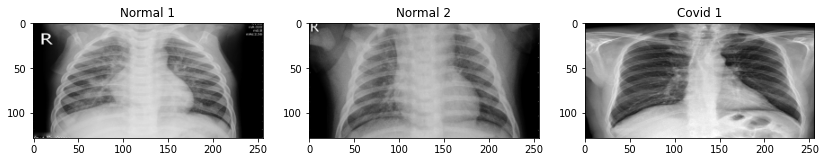

In [17]:
image_reshape=[None]*len(x)

for i in np.arange(0,len(x)):
  image_reshape[i]=cv.resize(x[i], (256,128), interpolation=cv.INTER_AREA)

plt.figure(figsize=(14,14))
plt.subplot(1,3,1).set_title('Normal 1')
plt.imshow(image_reshape[0],cmap='gray')
plt.subplot(1,3,2).set_title('Normal 2')
plt.imshow(image_reshape[234],cmap='gray')
plt.subplot(1,3,3).set_title('Covid 1')
plt.imshow(image_reshape[382],cmap='gray')
plt.show()


[0.01551771 0.         0.06497443 ... 0.         0.         0.36991692]


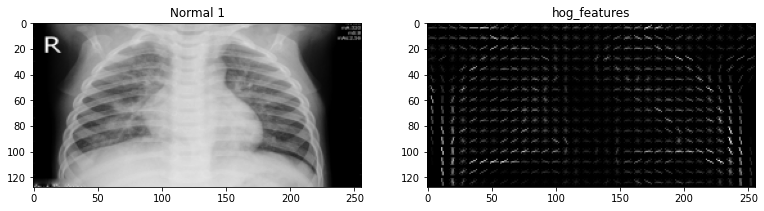

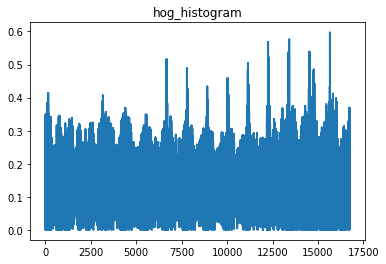

In [18]:
ppc=8
fd1,imagen1 = hog(image_reshape[200], orientations=9, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2) ,visualize=True)

print(fd1)


plt.figure(figsize=(20,20))
plt.subplot(1,3,1).set_title('Normal 1')
plt.imshow(image_reshape[0],cmap='gray')
plt.subplot(1,3,2).set_title('hog_features')
plt.imshow(imagen1,cmap='gray')
plt.show()


plt.plot(fd1)
plt.title('hog_histogram')
plt.show()

In [19]:
ppc = 8
hog_image=[]
features=[]

for i in np.arange(0,80):
  fd,imagen = hog(x[i], orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),block_norm= 'L2' ,visualize=True)

  features.append(fd)
  hog_image.append(imagen)

In [20]:
for i in np.arange(80,160):
  fd,imagen = hog(x[i], orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),block_norm= 'L2' ,visualize=True)

  features.append(fd)
  hog_image.append(imagen)

In [21]:
for i in np.arange(160,240):
  fd,imagen = hog(x[i], orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),block_norm= 'L2' ,visualize=True)

  features.append(fd)
  hog_image.append(imagen)

In [22]:
for i in np.arange(240,320):
  fd,imagen = hog(x[i], orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),block_norm= 'L2' ,visualize=True)

  features.append(fd)
  hog_image.append(imagen)

In [23]:
for i in np.arange(320,400):
  fd,imagen = hog(x[i], orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),block_norm= 'L2' ,visualize=True)

  features.append(fd)
  hog_image.append(imagen)

In [1]:
for i in np.arange(400,480):
  fd,imagen = hog(x[i], orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),block_norm= 'L2' ,visualize=True)

  features.append(fd)
  hog_image.append(imagen)

NameError: ignored

In [ ]:
for i in np.arange(480,560):
  fd,imagen = hog(x[i], orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),block_norm= 'L2' ,visualize=True)

  features.append(fd)
  hog_image.append(imagen)

In [ ]:
for i in np.arange(560,len(x)):
  fd,imagen = hog(x[i], orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),block_norm= 'L2' ,visualize=True)

  features.append(fd)
  hog_image.append(imagen)

----------------------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

photo    [[195, 193, 190, 183, 183, 180, 183, 176, 172,...
Name: 571, dtype: object


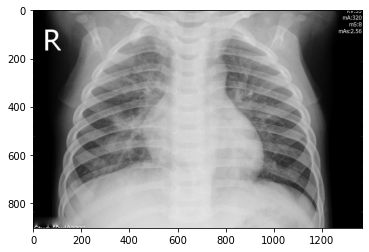

In [ ]:
#Transformo la matriz de arrays en una de DataFrame, es mas fácil para trabajarla
x_dataframe = pd.DataFrame(x,columns= ['photo'])

y_dataframe = pd.DataFrame(y,columns= ['classification'])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_dataframe, y_dataframe, test_size=0.2, random_state=1)
# Clasifico utilizando Support Vector Machine
classifier = svm.SVC(gamma=0.001)

print(x_train.iloc[0,:])


#img=cv.imread(x[0],0)
plt.imshow(x[0],cmap='gray')

In [ ]:
print(x_train.size)
print(len(x))     

print(x[0].shape)
print(x[150].shape)
print('')


print(num_normal_photos)
print(num_neumonia_photos)
print(num_covid_photos)

482
603
(904, 1368)
(1456, 1800)

234
148
221


In [ ]:
names_column_dataframe = pd.DataFrame(names_column,columns= ['Photo name'])

classification=[None]*index.size
for i in np.arange(0,index.size):
  #Normal
  if index[i]==0: 
    classification[i]=r'Normal'

  #Neumonía
  if index[i]==1: 
    classification[i]=r'Neumonia'

  #Covid
  if index[i]==2:
    classification[i]=r'Covid'   


#index_dataframe = pd.DataFrame(index,columns= ['Classification'])



#dataframe= pd.DataFrame([dataroot+'names',index],columns= ['Image','Mask'])

imagePath = os.path.join(dataroot, dataroot+'names')
labelPath = os.path.join(dataroot,classification)
print(imagePath)

result = extractor.execute(imagePath,labelPath)

TypeError: ignored